In [3]:
%matplotlib widget

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from pathlib import Path

In [8]:
from typing import List

In [9]:
name : str = "cascade0"

In [10]:
data = pd.read_csv(Path(name) / (name + ".csv"))

In [11]:
spaceStep = data[name + "0::SpaceStep"][0]

In [12]:
tolerence = spaceStep ** 2

In [13]:
frameCount = len(data[name + "0::SpaceStep"])

In [14]:
count = 2

In [15]:
regionProbabilities : List[List[np.array]] = []
regionNames : List[str] = ["Post", "3rdStair", "2ndStair", "1stStair", "Pre"]
regionIndex : int = 0
for regionName in regionNames: 
    regionProbabilities.append([])
    for ii in range(count): 
         regionProbabilities[regionIndex].append(data[name + str(ii) + "::Probabilities::" + regionName])
    regionIndex += 1

In [16]:
def displayRegion(probabilities : List[np.array], regionName : str): 
    plt.figure()
    legendLabels = []
    ii = 0
    for probabilitySet in probabilities: 
        plt.plot(np.arange(len(probabilitySet)), probabilitySet)
        legendLabels.append(regionName + str(ii))
        ii += 1
    plt.title(name)
    plt.legend(legendLabels)

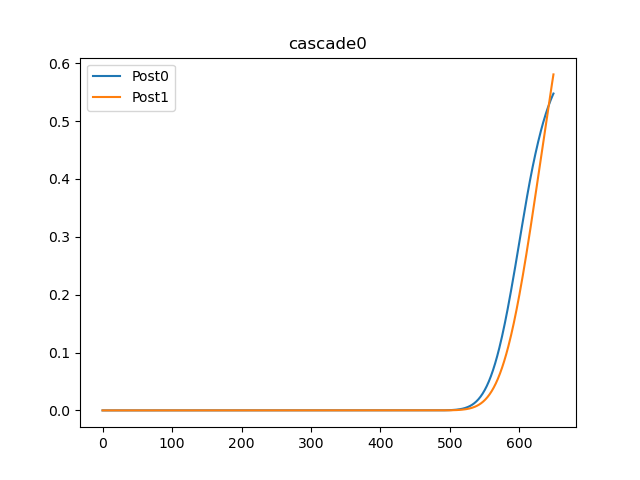

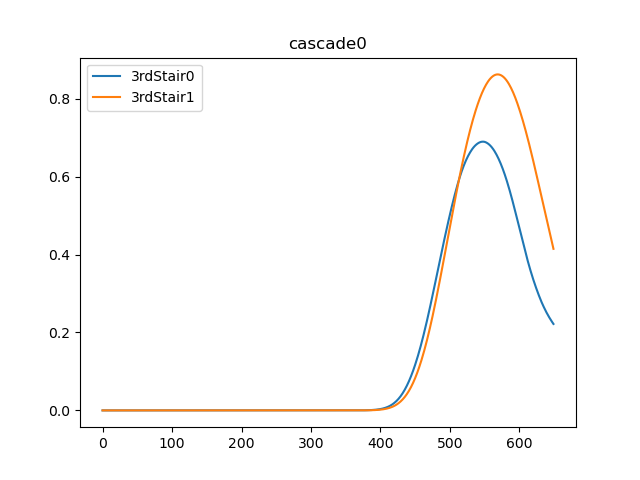

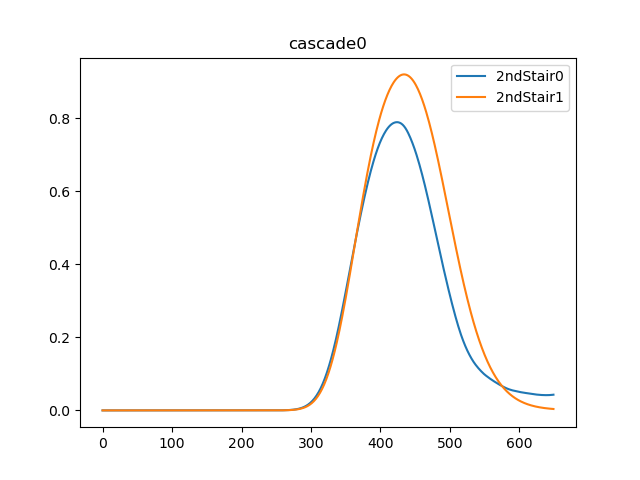

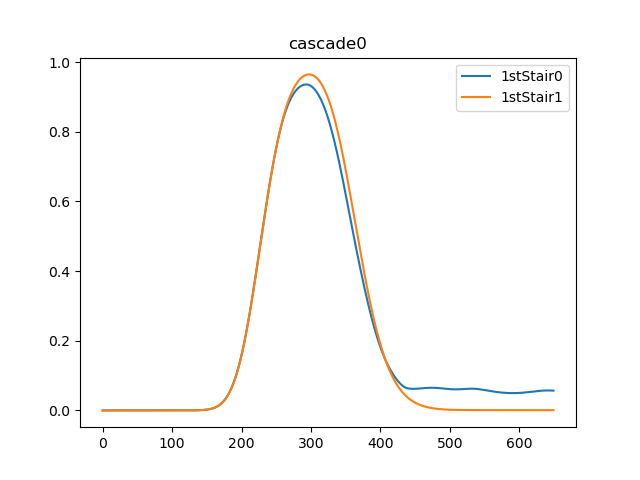

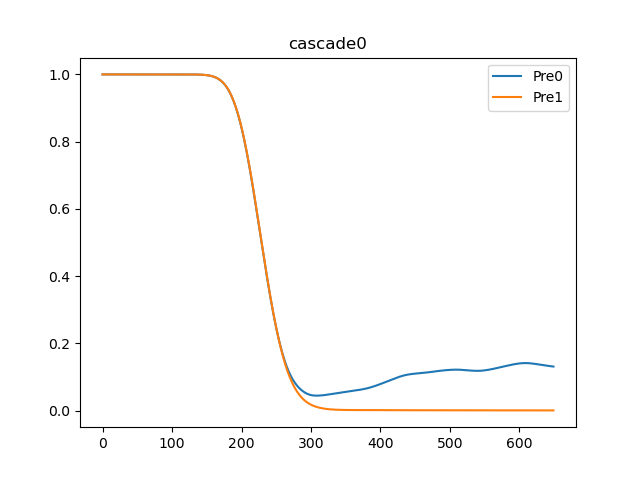

In [17]:
for ii in range(len(regionProbabilities)): 
    displayRegion(regionProbabilities[ii], regionNames[ii])

In [26]:
controlCaseIndex = 1
variableCaseIndicies = [0]
regionIndicies = [0, 1]

In [27]:
def computeControlVariableDifferences(
            controlCaseIndex, 
            variableCaseIndicies, 
            regionIndicies
        ): 
    variableFaster = []
    differences = []
    for regionIndex in regionIndicies: 
        differences.append([])
        for variableIndex in variableCaseIndicies: 
            differences[-1].append(regionProbabilities[regionIndex][variableIndex] - regionProbabilities[regionIndex][controlCaseIndex])
            variableFaster.append(np.where((differences[-1][-1] > 0) & (differences[-1][-1] > tolerence)))
    return differences, variableFaster

In [28]:
differences, variableFaster = computeControlVariableDifferences(controlCaseIndex, variableCaseIndicies, regionIndicies)

In [29]:
def plotControlVsVariable(variableIndex, regionIndicies, variableCaseIndicies, differences):
    plt.figure()
    legend = []
    legendTitle = lambda variableIndex, regionIndex : \
            "Variable" + str(variableCaseIndicies[variableIndex]) \
            + ":" + regionNames[regionIndicies[regionIndex]]
    for regionIndex in regionIndicies: 
        plt.plot(np.arange(0, frameCount), differences[regionIndex][variableIndex])
        legend.append(legendTitle(variableIndex, regionIndex))
    errorDigits = np.round(np.abs(np.log10(tolerence))) + 1
    propigatedError = np.sqrt(2 * tolerence ** 2)
    errorString = ("%." + str(int(errorDigits)) + "f") % propigatedError
    plt.ylabel("Difference in Probability +/-" + errorString)
    plt.xlabel("Time Index")
    plt.hlines([propigatedError, -propigatedError], 0, frameCount)
    plt.legend(legend)

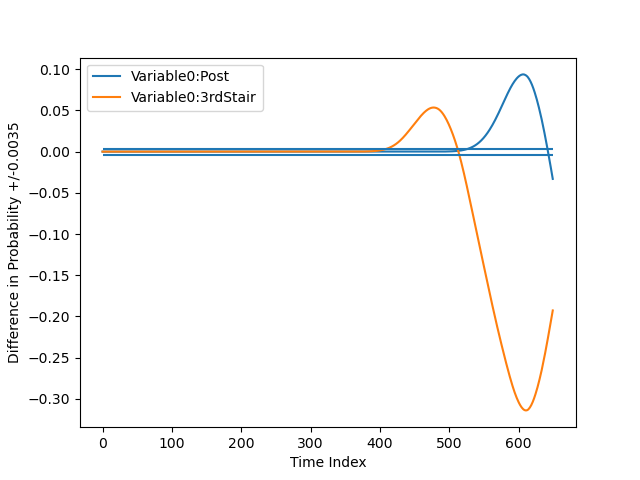

In [30]:
plotControlVsVariable(0, regionIndicies, variableCaseIndicies, differences)